# Data Processing

## Data Loading

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Load your dataset into a DataFrame
df = pd.read_csv("TampinesResaleFlat_with_LatLong_with_Features.csv")

## Data Inspection

In [669]:
df.shape

(13363, 22)

In [670]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Full Address', 'Latitude',
       'Longitude', 'nearest_bus_stop_distance', 'nearest_mrt_distance',
       'nearest_mall_distance', 'nearest_school_distance', 'bus_stop_count',
       'mrt_count', 'mall_count', 'school_count'],
      dtype='object')

In [671]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,Latitude,Longitude,nearest_bus_stop_distance,nearest_mrt_distance,nearest_mall_distance,nearest_school_distance,bus_stop_count,mrt_count,mall_count,school_count
0,2017-01,TAMPINES,2 ROOM,299A,TAMPINES ST 22,01 TO 03,45,Model A,2012,94 years 02 months,...,1.350005,103.953938,74.413446,NaN,NaN,308.671041,13.0,0.0,0.0,4.0
1,2017-01,TAMPINES,3 ROOM,403,TAMPINES ST 41,01 TO 03,60,Improved,1985,67 years 09 months,...,1.357512,103.944918,72.814515,457.922913,369.959209,465.132319,15.0,1.0,2.0,4.0
2,2017-01,TAMPINES,3 ROOM,802,TAMPINES AVE 4,04 TO 06,68,New Generation,1984,66 years 05 months,...,1.346084,103.938034,120.999263,NaN,NaN,203.682444,12.0,0.0,0.0,4.0
3,2017-01,TAMPINES,3 ROOM,410,TAMPINES ST 41,01 TO 03,69,Improved,1985,67 years 08 months,...,1.358778,103.946271,114.172862,NaN,526.408805,315.694223,12.0,0.0,1.0,4.0
4,2017-01,TAMPINES,3 ROOM,462,TAMPINES ST 44,07 TO 09,64,Simplified,1987,69 years 06 months,...,1.359013,103.955111,93.841568,NaN,NaN,229.786957,20.0,0.0,0.0,2.0


In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13363 entries, 0 to 13362
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      13363 non-null  object 
 1   town                       13363 non-null  object 
 2   flat_type                  13363 non-null  object 
 3   block                      13363 non-null  object 
 4   street_name                13363 non-null  object 
 5   storey_range               13363 non-null  object 
 6   floor_area_sqm             13363 non-null  int64  
 7   flat_model                 13363 non-null  object 
 8   lease_commence_date        13363 non-null  int64  
 9   remaining_lease            13363 non-null  object 
 10  resale_price               13363 non-null  int64  
 11  Full Address               13363 non-null  object 
 12  Latitude                   13363 non-null  float64
 13  Longitude                  13363 non-null  flo

In [673]:
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease                  0
resale_price                     0
Full Address                     0
Latitude                         0
Longitude                        0
nearest_bus_stop_distance        4
nearest_mrt_distance          7363
nearest_mall_distance        10345
nearest_school_distance        400
bus_stop_count                   4
mrt_count                        4
mall_count                       4
school_count                     4
dtype: int64

## Data Cleaning

In [674]:
# Replacing NaN values with 0 for the count variables (bus_stop_count, mrt_count, mall_count, school_count)
df['bus_stop_count'] = df['bus_stop_count'].fillna(0)
df['mrt_count'] = df['mrt_count'].fillna(0)
df['mall_count'] = df['mall_count'].fillna(0)
df['school_count'] = df['school_count'].fillna(0)

# Check for missing values again to ensure the counts are handled
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease                  0
resale_price                     0
Full Address                     0
Latitude                         0
Longitude                        0
nearest_bus_stop_distance        4
nearest_mrt_distance          7363
nearest_mall_distance        10345
nearest_school_distance        400
bus_stop_count                   0
mrt_count                        0
mall_count                       0
school_count                     0
dtype: int64

In [675]:
# Set a random seed for reproducibility
np.random.seed(42)

# Drop rows where 'nearest_school_distance' is missing
df.dropna(subset=['nearest_school_distance'], inplace=True)

# Fill missing values for other columns with random sampling within the range 501-1000
columns_to_fill = ['nearest_mrt_distance', 'nearest_mall_distance', 'nearest_bus_stop_distance']

for column in columns_to_fill:
    if df[column].isnull().sum() > 0:  # Only fill if there are missing values
        df[column] = df[column].apply(lambda x: np.random.randint(501, 1001) if pd.isnull(x) else x)

# Check for missing values again
df.isnull().sum()

month                        0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
remaining_lease              0
resale_price                 0
Full Address                 0
Latitude                     0
Longitude                    0
nearest_bus_stop_distance    0
nearest_mrt_distance         0
nearest_mall_distance        0
nearest_school_distance      0
bus_stop_count               0
mrt_count                    0
mall_count                   0
school_count                 0
dtype: int64

In [676]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Missing Values:
 Series([], dtype: int64)

Number of duplicate rows: 3


In [677]:
# Remove duplicates
df = df.drop_duplicates()

# Confirm that duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


In [678]:
#Split the month column into two separate columns: year and month
df['year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [679]:
def convert_to_months(lease_str):
    # Check if the lease string includes a months portion
    if "months" in lease_str:
        # Expected format: "<years> years <months> months"
        years = int(lease_str.split(" years ")[0])
        months = int(lease_str.split(" years ")[1].split(" months")[0])
    else:
        # Format with only years: "<years> years"
        years = int(lease_str.split(" years")[0])
        months = 0
    return years * 12 + months

df['remaining_lease_months'] = df['remaining_lease'].apply(convert_to_months)
df.drop(columns=['remaining_lease'], inplace=True)

In [680]:
# Initialize the encoder with drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'flat_type' column
encoded_features = encoder.fit_transform(df[['flat_type']])

# Create a dataframe with the encoded features using the built-in method for feature names
feature_names = encoder.get_feature_names_out(['flat_type'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding flat_type) with the encoded features
df = pd.concat([df.drop('flat_type', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

   month      town block     street_name storey_range  floor_area_sqm  \
0    1.0  TAMPINES  299A  TAMPINES ST 22     01 TO 03            45.0   
1    1.0  TAMPINES   403  TAMPINES ST 41     01 TO 03            60.0   
2    1.0  TAMPINES   802  TAMPINES AVE 4     04 TO 06            68.0   
3    1.0  TAMPINES   410  TAMPINES ST 41     01 TO 03            69.0   
4    1.0  TAMPINES   462  TAMPINES ST 44     07 TO 09            64.0   

       flat_model  lease_commence_date  resale_price         Full Address  \
0         Model A               2012.0      250000.0  299A TAMPINES ST 22   
1        Improved               1985.0      270000.0   403 TAMPINES ST 41   
2  New Generation               1984.0      295000.0   802 TAMPINES AVE 4   
3        Improved               1985.0      300000.0   410 TAMPINES ST 41   
4      Simplified               1987.0      305000.0   462 TAMPINES ST 44   

   ...  mrt_count  mall_count  school_count    year  remaining_lease_months  \
0  ...        0.0  

In [681]:
# Initialize the encoder with drop='first' to drop the first category (similar to drop_first=True)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'street_name' column
encoded_features = encoder.fit_transform(df[['street_name']])

# Create a dataframe with the encoded features
# Get the feature names and remove the 'street_name_' prefix for cleaner column names if desired
feature_names = encoder.get_feature_names_out(['street_name'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding street_name) with the encoded features
df = pd.concat([df.drop('street_name', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

   month      town block storey_range  floor_area_sqm      flat_model  \
0    1.0  TAMPINES  299A     01 TO 03            45.0         Model A   
1    1.0  TAMPINES   403     01 TO 03            60.0        Improved   
2    1.0  TAMPINES   802     04 TO 06            68.0  New Generation   
3    1.0  TAMPINES   410     01 TO 03            69.0        Improved   
4    1.0  TAMPINES   462     07 TO 09            64.0      Simplified   

   lease_commence_date  resale_price         Full Address  Latitude  ...  \
0               2012.0      250000.0  299A TAMPINES ST 22  1.350005  ...   
1               1985.0      270000.0   403 TAMPINES ST 41  1.357512  ...   
2               1984.0      295000.0   802 TAMPINES AVE 4  1.346084  ...   
3               1985.0      300000.0   410 TAMPINES ST 41  1.358778  ...   
4               1987.0      305000.0   462 TAMPINES ST 44  1.359013  ...   

   street_name_TAMPINES ST 61  street_name_TAMPINES ST 71  \
0                         0.0              

In [682]:
# Initialize the encoder with drop='first' to drop the first category (similar to drop_first=True)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'flat_model' column
encoded_features = encoder.fit_transform(df[['flat_model']])

# Create a dataframe with the encoded features
feature_names = encoder.get_feature_names_out(['flat_model'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding flat_model) with the encoded features
df = pd.concat([df.drop('flat_model', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

   month      town block storey_range  floor_area_sqm  lease_commence_date  \
0    1.0  TAMPINES  299A     01 TO 03            45.0               2012.0   
1    1.0  TAMPINES   403     01 TO 03            60.0               1985.0   
2    1.0  TAMPINES   802     04 TO 06            68.0               1984.0   
3    1.0  TAMPINES   410     01 TO 03            69.0               1985.0   
4    1.0  TAMPINES   462     07 TO 09            64.0               1987.0   

   resale_price         Full Address  Latitude   Longitude  ...  \
0      250000.0  299A TAMPINES ST 22  1.350005  103.953938  ...   
1      270000.0   403 TAMPINES ST 41  1.357512  103.944918  ...   
2      295000.0   802 TAMPINES AVE 4  1.346084  103.938034  ...   
3      300000.0   410 TAMPINES ST 41  1.358778  103.946271  ...   
4      305000.0   462 TAMPINES ST 44  1.359013  103.955111  ...   

   flat_model_DBSS  flat_model_Improved  flat_model_Maisonette  \
0              0.0                  0.0                    0.0

In [683]:
import pandas as pd
import numpy as np

# Function to convert storey range to average floor level
def convert_storey_range(range_str):
    if isinstance(range_str, str):  # Ensure the value is a string before processing
        low, high = map(int, range_str.replace(' TO ', ' ').split())
        return (low + high) / 2
    return np.nan  # Return NaN if the value is not a string

# Convert storey_range to average floor level and create a new column 'storey_level'
df['storey_level'] = df['storey_range'].apply(convert_storey_range)

# Drop the 'storey_range' column as it's no longer needed
df.drop(columns=['storey_range'], inplace=True)

# Display the first few rows of the modified dataframe
df.head()

,month,town,block,floor_area_sqm,lease_commence_date,resale_price,Full Address,Latitude,Longitude,nearest_bus_stop_distance,...,flat_model_Improved,flat_model_Maisonette,flat_model_Model A,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_nan,storey_level
0,1.0,TAMPINES,299A,45.0,2012.0,250000.0,299A TAMPINES ST 22,1.350005,103.953938,74.413446,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,TAMPINES,403,60.0,1985.0,270000.0,403 TAMPINES ST 41,1.357512,103.944918,72.814515,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.0,TAMPINES,802,68.0,1984.0,295000.0,802 TAMPINES AVE 4,1.346084,103.938034,120.999263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
3,1.0,TAMPINES,410,69.0,1985.0,300000.0,410 TAMPINES ST 41,1.358778,103.946271,114.172862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,TAMPINES,462,64.0,1987.0,305000.0,462 TAMPINES ST 44,1.359013,103.955111,93.841568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0


In [684]:
# Drop the original 'town' column
df.drop(columns=['town'], inplace=True, errors='ignore')

In [685]:
df.drop(columns=['block'], inplace=True, errors='ignore')

In [686]:
# Drop the original 'full address' column
df.drop(columns=['Full Address'], inplace=True, errors='ignore')

# Check the result
print(df.head())

   month  floor_area_sqm  lease_commence_date  resale_price  Latitude  \
0    1.0            45.0               2012.0      250000.0  1.350005   
1    1.0            60.0               1985.0      270000.0  1.357512   
2    1.0            68.0               1984.0      295000.0  1.346084   
3    1.0            69.0               1985.0      300000.0  1.358778   
4    1.0            64.0               1987.0      305000.0  1.359013   

    Longitude  nearest_bus_stop_distance  nearest_mrt_distance  \
0  103.953938                  74.413446            603.000000   
1  103.944918                  72.814515            457.922913   
2  103.938034                 120.999263            936.000000   
3  103.946271                 114.172862            849.000000   
4  103.955111                  93.841568            771.000000   

   nearest_mall_distance  nearest_school_distance  ...  flat_model_Improved  \
0             558.000000               308.671041  ...                  0.0   
1     

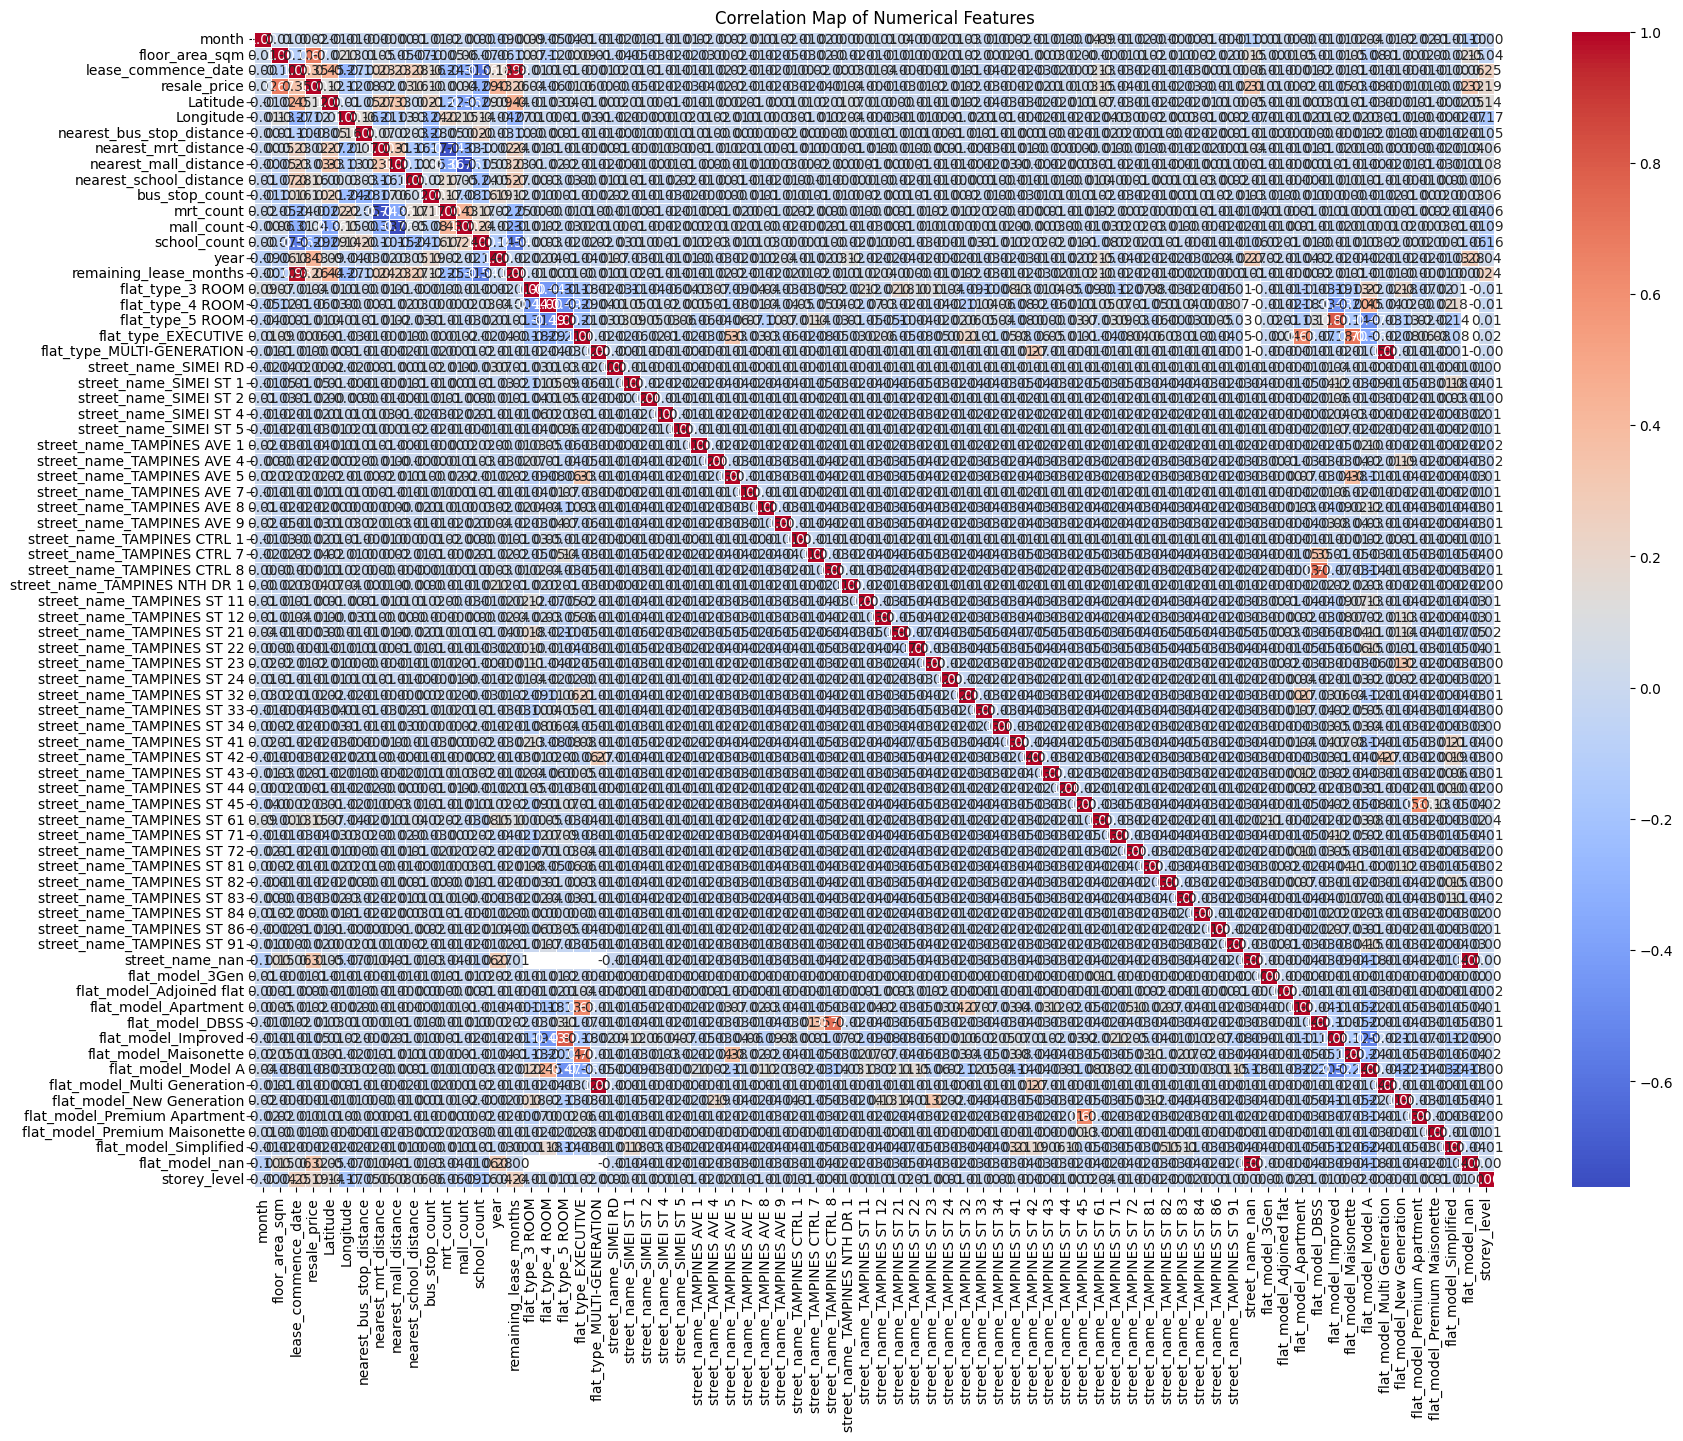

In [687]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation map
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map of Numerical Features')
plt.show()

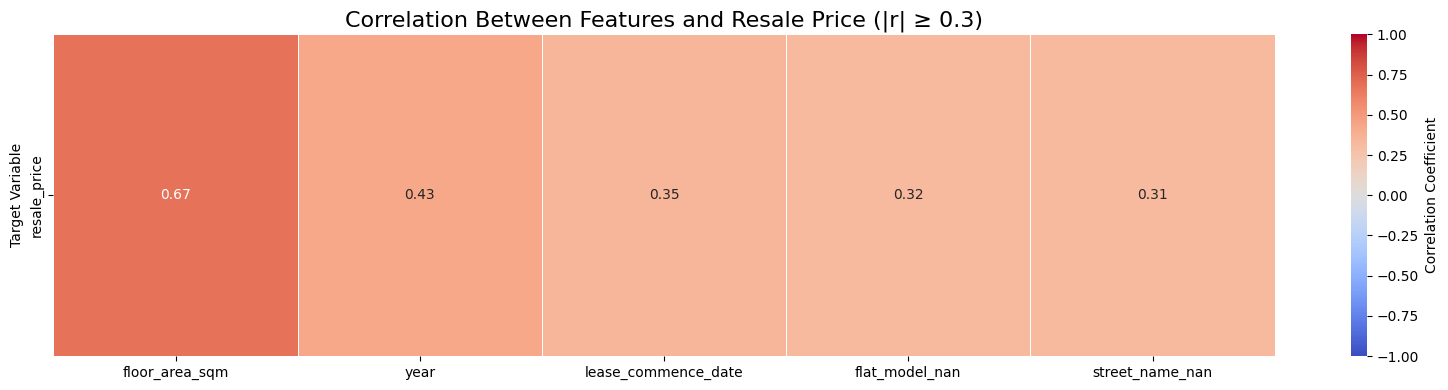

In [688]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with resale price
price_correlations = numerical_features.corr()['resale_price'].drop('resale_price')

# Define correlation threshold
threshold = 0.3  # You can adjust this value based on your needs

# Filter correlations based on threshold
significant_correlations = price_correlations[abs(price_correlations) >= threshold]

# Sort by absolute correlation value
sorted_correlations = significant_correlations.abs().sort_values(ascending=False)
sorted_features = sorted_correlations.index

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(price_correlations[sorted_features]).T

# Create the heatmap
plt.figure(figsize=(16, 4))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

plt.title(f'Correlation Between Features and Resale Price (|r| ≥ {threshold})', fontsize=16)
plt.ylabel('Target Variable')
plt.tight_layout()
plt.show()

## Feature Scaling

In [689]:
# List of numerical features
numerical_features = ['month', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 
                      'Latitude', 'Longitude', 'nearest_bus_stop_distance', 'nearest_mrt_distance', 
                      'nearest_mall_distance', 'nearest_school_distance', 'bus_stop_count', 
                      'mrt_count', 'mall_count', 'school_count', 'year', 'remaining_lease_months', 
                      'storey_level']

# List of categorical features (one-hot encoded)
categorical_features = [col for col in df.columns if col not in numerical_features]

# storing values before one hot encoding for reverse scaling usage
original_numerical_stats = {}
for col in numerical_features:
    original_numerical_stats[col] = {"mean": df[col].mean(), "std": df[col].std()}    

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Combine the scaled numerical features with the one-hot encoded categorical features
scaled_df = pd.concat([df[numerical_features], df[categorical_features]], axis=1)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

      month  floor_area_sqm  lease_commence_date  resale_price  Latitude  \
0 -1.649111       -2.422442             1.740656     -1.904940 -0.670082   
1 -1.649111       -1.808279            -0.737618     -1.773019  0.729189   
2 -1.649111       -1.480726            -0.829406     -1.608117 -1.400988   
3 -1.649111       -1.439782            -0.737618     -1.575137  0.965206   
4 -1.649111       -1.644502            -0.554042     -1.542157  1.009106   

   Longitude  nearest_bus_stop_distance  nearest_mrt_distance  \
0   0.892430                  -0.683619              0.023360   
1  -0.087143                  -0.714185             -0.622277   
2  -0.834711                   0.206930              1.505312   
3   0.059777                   0.076434              1.118136   
4   1.019803                  -0.312225              0.771012   

   nearest_mall_distance  nearest_school_distance  ...  flat_model_DBSS  \
0              -0.497511                 0.305400  ...              0.0   
1 

## Reverse Scaling
For models that do not use normalization

In [690]:
# Copy the original dataset to modify
reverse_df = df.copy()

# Reverse scaling for all numerical features using stored means/stds for xgboost
for col in numerical_features:
    reverse_df[col] = (reverse_df[col] * original_numerical_stats[col]["std"]) + original_numerical_stats[col]["mean"]

# Round and convert specific numerical values
reverse_df["month"] = reverse_df["month"].round().astype("Int64")
reverse_df["year"] = reverse_df["year"].round().astype("Int64")
reverse_df["storey_level"] = reverse_df["storey_level"].round().astype("Int64")
reverse_df["lease_commence_date"] = reverse_df["lease_commence_date"].round().astype("Int64")

# Identify original categorical columns before one-hot encoding
reverse_categorical_columns = ["flat_type", "storey_level", "flat_model", "street_name"]

# Reconstruct categorical columns from one-hot encoded data
for col in reverse_categorical_columns:
    one_hot_cols = [c for c in reverse_df.columns if c.startswith(f"{col}_")]
    if one_hot_cols:
        reverse_df[col] = reverse_df[one_hot_cols].idxmax(axis=1).str[len(col) + 1:]
        reverse_df.drop(columns=one_hot_cols, inplace=True)

# Sort dataset by year first, then by month
reverse_df.sort_values(by=["year", "month"], ascending=[True, True], inplace=True)

# Now define the training (≤2022) and testing (≥2023) sets
train_df = reverse_df[reverse_df['year'] <= 2022].copy()
test_df = reverse_df[reverse_df['year'] >= 2023].copy()

# Define features and target variable
X_train = train_df.drop(columns=["resale_price"])
y_train = train_df["resale_price"]
X_test = test_df.drop(columns=["resale_price"])
y_test = test_df["resale_price"]

C:\Users\hhuim\AppData\Local\Temp\ipykernel_42084\1338494216.py:21: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  reverse_df[col] = reverse_df[one_hot_cols].idxmax(axis=1).str[len(col) + 1:]
C:\Users\hhuim\AppData\Local\Temp\ipykernel_42084\1338494216.py:21: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  reverse_df[col] = reverse_df[one_hot_cols].idxmax(axis=1).str[len(col) + 1:]


# XGBoost

In [691]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from builtins import range 

In [692]:
# copy datasets to modify
xg_train_df = train_df.copy()
xg_test_df = test_df.copy()

xg_X_train = X_train.copy()
xg_y_train = y_train.copy()

xg_X_test = X_test.copy()
xg_y_test = y_test.copy()

# Convert object columns to categorical
for col in reverse_categorical_columns:
    xg_X_train[col] = xg_X_train[col].astype("category")
    xg_X_test[col] = xg_X_test[col].astype("category")
town_mapping = dict(enumerate(xg_X_train["street_name"].cat.categories))

# Create an OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the encoder on the categorical columns in the training data
xg_X_train[reverse_categorical_columns] = encoder.fit_transform(xg_X_train[reverse_categorical_columns])

# Transform the categorical columns in the testing data
xg_X_test[reverse_categorical_columns] = encoder.transform(xg_X_test[reverse_categorical_columns])


### Training Set and Testing Set Visualisation

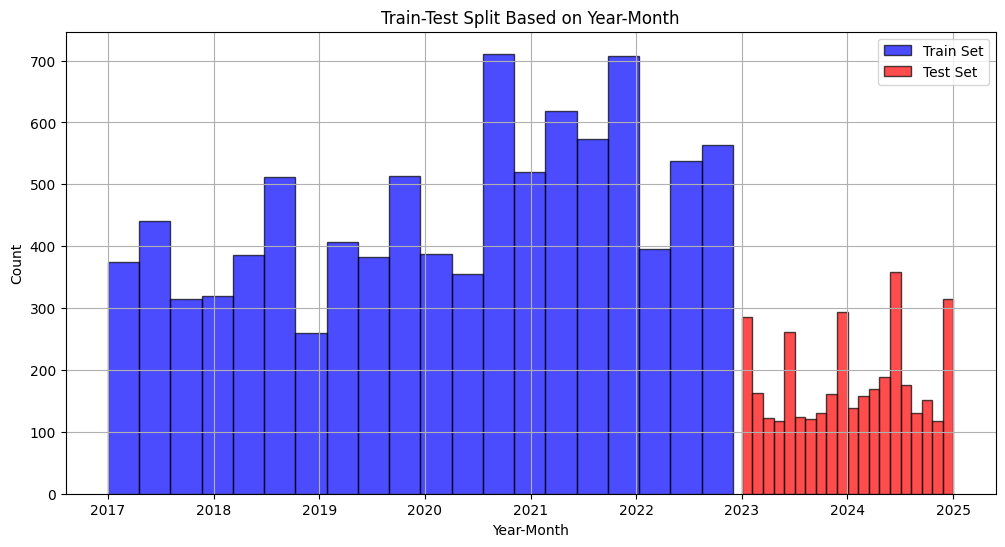

In [693]:
# Create a continuous time axis by combining year and month
xg_train_df["YearMonth"] = xg_train_df["year"].astype(str) + "-" + xg_train_df["month"].astype(str).str.zfill(2)
xg_test_df["YearMonth"] = xg_test_df["year"].astype(str) + "-" + xg_test_df["month"].astype(str).str.zfill(2)

# Convert to datetime format for proper ordering in the plot
xg_train_df["YearMonth"] = pd.to_datetime(xg_train_df["YearMonth"])
xg_test_df["YearMonth"] = pd.to_datetime(xg_test_df["YearMonth"])

# Plot train and test distributions
plt.figure(figsize=(12, 6))

plt.hist(xg_train_df["YearMonth"], bins=20, alpha=0.7, label="Train Set", color="blue", edgecolor="black")
plt.hist(xg_test_df["YearMonth"], bins=20, alpha=0.7, label="Test Set", color="red", edgecolor="black")

plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.title("Train-Test Split Based on Year-Month")
plt.legend()
plt.grid(True)
plt.show()

### Feature Selection Using Recursive Feature Elimination (RFE)

- RFE automates feature selection instead of testing all combinations manually

How RFE works:

1. Start with All Features
    - The model is trained using all available features.
2. Rank Feature Importance
    - Based on the model's importance scores (e.g., feature weights in XGBoost), RFE determines which features contribute the least.
3. Remove the Least Important Feature
    - The least important feature is eliminated from the dataset.
4. Repeat Until Desired Number of Features Remains
    - The process continues iteratively until only the top N features are left.

In [694]:
# Define base features (always included, taken from previous feature selection in sorted_features)
base_features = ["floor_area_sqm", "year", "lease_commence_date", "flat_model", "street_name"]

# Get remaining features by excluding base features
remaining_features = [col for col in xg_X_train.columns if col not in base_features]

# Initialize the model
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, objective="reg:squarederror")

# Store results
best_n_features = None
best_rmse = float("inf")  # Start with a very high RMSE
best_selected_features = None

# Try different numbers of features
for n in range(1, len(remaining_features) + 1):  # Test from 1 to all remaining features
    rfe = RFE(estimator=model, n_features_to_select=n, step=1)
    rfe.fit(xg_X_train[remaining_features], xg_y_train)

    # Get selected features
    selected_rfe_features = xg_X_train[remaining_features].columns[rfe.support_]
    
    # Combine base features and selected features
    final_selected_features = list(base_features) + list(selected_rfe_features)
    
    # Train model with selected features
    model.fit(xg_X_train[final_selected_features], xg_y_train)
    xg_y_pred = model.predict(xg_X_test[final_selected_features])

    # Evaluate performance
    rmse = mean_squared_error(xg_y_test, xg_y_pred) ** 0.5
    print(f"n_features={n}, RMSE={rmse}")

    # Update best selection if RMSE improves
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_features = n
        best_selected_features = final_selected_features

# Print best results
print("\nBest number of features:", best_n_features)
print("Best selected features:", best_selected_features)
print("Best RMSE:", best_rmse)

# Use the best selected features for final training
xg_X_train = xg_X_train[best_selected_features]
xg_X_test = xg_X_test[best_selected_features]

n_features=1, RMSE=87836.99241328612
n_features=2, RMSE=85043.38495142813
n_features=3, RMSE=84065.95282368745
n_features=4, RMSE=86214.3964440249
n_features=5, RMSE=84736.88642489494
n_features=6, RMSE=83088.19077017154
n_features=7, RMSE=82487.78068759633
n_features=8, RMSE=82674.88549374149
n_features=9, RMSE=83437.11796944147
n_features=10, RMSE=83952.93023057652
n_features=11, RMSE=84858.50575682563
n_features=12, RMSE=85841.45044172171
n_features=13, RMSE=87130.01826161254
n_features=14, RMSE=90411.23717499338

Best number of features: 7
Best selected features: ['floor_area_sqm', 'year', 'lease_commence_date', 'flat_model', 'street_name', 'Latitude', 'Longitude', 'nearest_school_distance', 'bus_stop_count', 'mall_count', 'school_count', 'remaining_lease_months']
Best RMSE: 82487.78068759633


### Further Training XGBoost Model

In [695]:
# Define the parameter grid (params have been adjusted after multiple runs of training)
xg_param_grid = { 
    "n_estimators": [1700], 
    'max_depth': [3],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.6],
    "reg_alpha": [0.2],  # L1 regularization
    "reg_lambda": [0.1],  # L2 regularization
}

# Use TimeSeriesSplit for proper time-based validation
tscv = TimeSeriesSplit(n_splits=5)

# Create the model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=1,
    enable_categorical=True
)

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xg_param_grid,
    scoring='neg_mean_absolute_error',
    cv=tscv,  # Use TimeSeriesSplit instead of default K-Fold
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(xg_X_train, xg_y_train)

# Get best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print best parameters
print("Best Parameters:", best_params)

# Train the final model
final_model = xgb.XGBRegressor(
    **best_params,  # Use best parameters found by GridSearchCV
    objective='reg:squarederror',
    random_state=1,
    enable_categorical=True
)

final_model.fit(
    xg_X_train, xg_y_train,
    eval_set=[(xg_X_test, xg_y_test)],
    verbose=True
)

print("Final model trained successfully!")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1700, 'reg_alpha': 0.2, 'reg_lambda': 0.1, 'subsample': 0.8}
[0]	validation_0-rmse:190011.41357
[1]	validation_0-rmse:185364.37727
[2]	validation_0-rmse:179127.28024
[3]	validation_0-rmse:172546.00920
[4]	validation_0-rmse:167892.19952
[5]	validation_0-rmse:163653.10418
[6]	validation_0-rmse:159699.09338
[7]	validation_0-rmse:156239.26816
[8]	validation_0-rmse:153021.80756
[9]	validation_0-rmse:152377.99663
[10]	validation_0-rmse:146703.21552
[11]	validation_0-rmse:142585.60169
[12]	validation_0-rmse:138294.10649
[13]	validation_0-rmse:136172.86225
[14]	validation_0-rmse:135608.75020
[15]	validation_0-rmse:130695.80108
[16]	validation_0-rmse:130300.27536
[17]	validation_0-rmse:126111.89414
[18]	validation_0-rmse:125788.60514
[19]	validation_0-rmse:123349.54016
[20]	validation_0-rmse:119854.70170
[21]	validation_0-rmse:118923.64624
[

### Model Evaluation

In [696]:
# Make predictions on the test set
xg_y_pred = final_model.predict(xg_X_test)

# Compute MAE, MSE, RMSE and R²
mae = mean_absolute_error(xg_y_test, xg_y_pred)
mse = mean_squared_error(xg_y_test, xg_y_pred)
mape = np.mean(np.abs((xg_y_test - xg_y_pred) / xg_y_test)) * 100
r2 = r2_score(xg_y_test, xg_y_pred)
rmse = np.sqrt(mse)

mean_resale_price = np.mean(xg_y_test)
relative_mae = (mae / mean_resale_price) * 100
relative_rmse = (rmse / mean_resale_price) * 100

# Check the minimum and maximum resale prices
min_price = reverse_df["resale_price"].min()
max_price = reverse_df["resale_price"].max()

range = max_price - min_price

# Display the metrics
print(f"Resale Price Range: ${min_price:.2f} to ${max_price:.2f}")
print(f"Difference: ${range:.2f}")

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Relative MAE: {relative_mae:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

Resale Price Range: $149985.00 to $1140023.20
Difference: $990038.20
Mean Absolute Error (MAE): 55727.18
Relative MAE: 8.83%
Root Mean Squared Error (RMSE): 74252.13
Relative RMSE: 11.76%
Mean Absolute Percentage Error (MAPE): 8.32%
R² Score: 0.7561


<hr><b> Findings </b><hr>

MAE: 55,727.18, ~8.83%
- Lower MAE means more accurate predictions
- On average, the model's predicted resale price deviates by ~$55,727.18 from the actual price
- Relative MAE value is ~8.83% off from actual prices, which is moderate for real estate forecasting (<10% is generally acceptable for property price predictions)

RMSE: 74,252.13, ~11.76%
- Lower RMSE means more accurate predictions
- RMSE value is ~11.76% of the mean resale price, which suggests room for improvement

Comparing MAE and RMSE:
- RMSE penalizes large errors more, so a high RMSE suggests some large deviations
- RMSE is much larger than MAE, indicating outliers affecting the model
- While the average error is $55,727 (MAE), larger errors push the RMSE up to $74,252

MAPE: 8.32%
- On average, the model's predictions are 8.32% off from the true resale prices
- Since MAPE is under 10%, the model is performing well in relative terms

R² Score: 0.7561
- Measures how much variance in the target variable is explained by the model
- The closer to 1, the better the model is
- Above 0.7 is generally considered good
- 75.61% of the variance in resale prices are explained by the model
- R² Score of 0.7561 suggests the model captures most of the trends

Conclusion:
- The model provides a decent level of accuracy for general trends in resale prices.

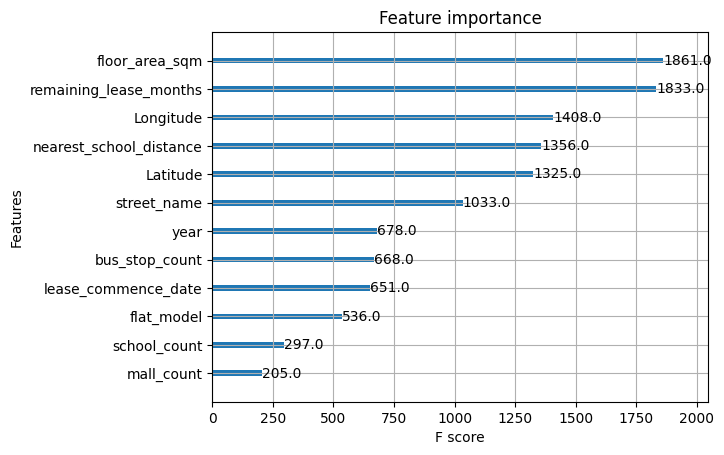

In [697]:
xgb.plot_importance(final_model)
plt.show()

### Actual VS Predicted Prices

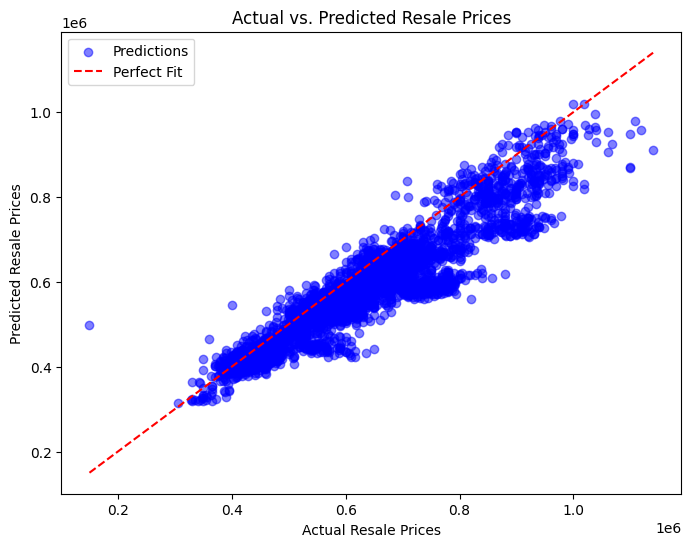

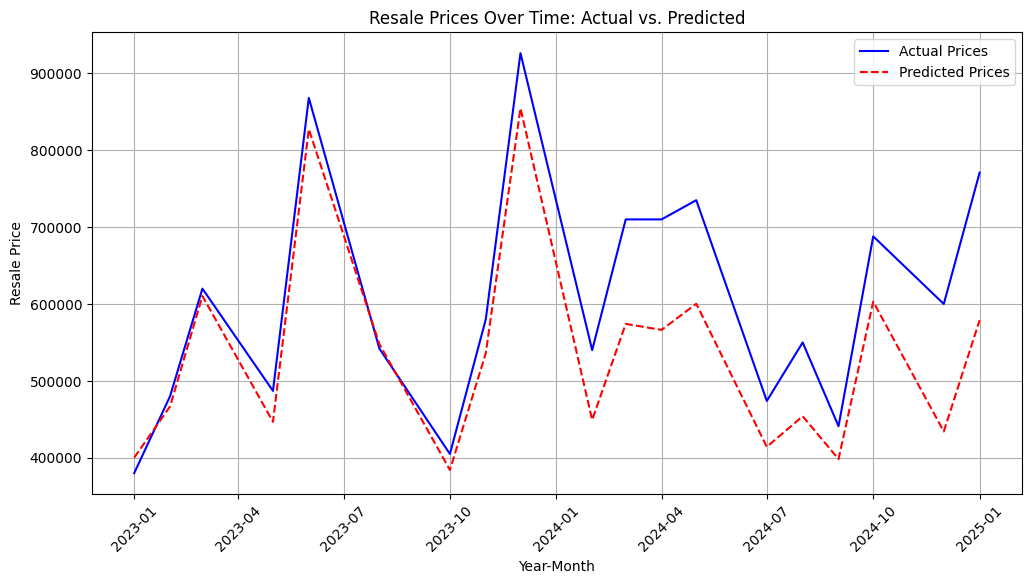

In [698]:
# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(xg_y_test, xg_y_pred, alpha=0.5, label="Predictions", color='blue')
plt.plot([min(xg_y_test), max(xg_y_test)], [min(xg_y_test), max(xg_y_test)], '--r', label="Perfect Fit")

plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.title("Actual vs. Predicted Resale Prices")
plt.legend()
plt.show()

# Create dataframe for plotting
xg_results_df = pd.DataFrame({
    "YearMonth": xg_test_df["YearMonth"],
    "Actual": xg_y_test,
    "Predicted": xg_y_pred
})

# Select every nth point for visualization
xg_sampled_df = xg_results_df.iloc[::200]

# Plot sampled points
plt.figure(figsize=(12, 6))
plt.plot(xg_sampled_df["YearMonth"], xg_sampled_df["Actual"], label="Actual Prices", color="blue")
plt.plot(xg_sampled_df["YearMonth"], xg_sampled_df["Predicted"], label="Predicted Prices", linestyle="dashed", color="red")

plt.xlabel("Year-Month")
plt.ylabel("Resale Price")
plt.title("Resale Prices Over Time: Actual vs. Predicted")

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### Residual Distribution Histogram

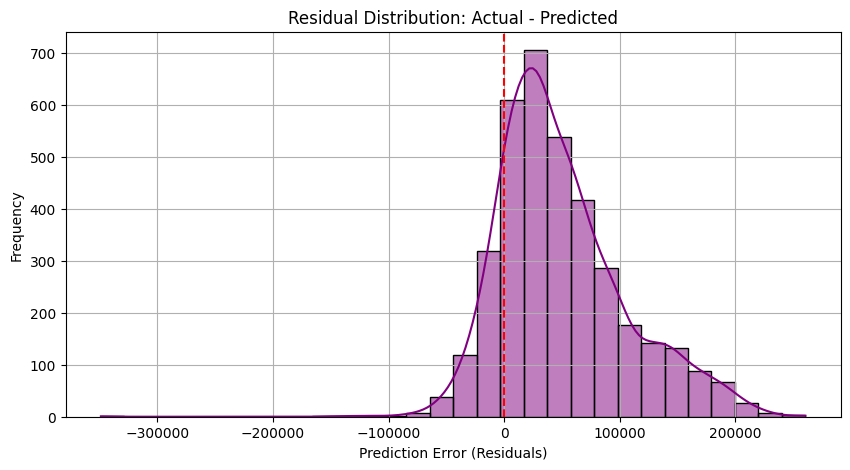

In [699]:
# Compute residuals (errors)
residuals = xg_y_test - xg_y_pred

# Plot residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")

plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution: Actual - Predicted")
plt.axvline(x=0, color='red', linestyle='dashed')  # Vertical line at zero
plt.grid(True)
plt.show()

Residuals = Actual Resale Price - Predicted Resale Price
- Represents the difference between actual and predicted values
- Good model should have residuals centered around zero, meaning predictions are unbiased
- Red vertical line at zero represents the ideal case where all predictions are perfect

- The histogram resembles a normal distribution, which is generally a good sign
- The peak around zero means most errors are small
- However, the distribution is slightly skewed to the right, meaning the model tends to underestimate some prices